## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_7138_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (98494, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts   er   pac         lng  \
0      GSABZT030K000A230910264  2023-12-15 07:05:00  NaN  0.11  109.151695   
1      GSABZT030K000A230910264  2023-12-15 07:10:00  NaN  0.00  109.151695   
2      GSABZT030K000A230910264  2023-12-15 07:15:00  NaN  0.12  109.151695   
3      GSABZT030K000A230910264  2023-12-15 07:20:00  NaN  0.14  109.151695   
4      GSABZT030K000A230910264  2023-12-15 07:25:00  NaN  0.26  109.151695   
...                        ...                  ...  ...   ...         ...   
98489  GSABZT030K000A230910264  2025-05-10 19:10:00  0.0  0.11  109.151695   
98490  GSABZT030K000A230910264  2025-05-10 19:15:00  0.0  0.12  109.151695   
98491  GSABZT030K000A230910264  2025-05-10 19:20:00  0.0  0.12  109.151695   
98492  GSABZT030K000A230910264  2025-05-10 19:25:00  0.0  0.11  109.151695   
98493  GSABZT030K000A230910264  2025-05-10 19:30:00  0.0  0.11  109.151695   

            lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      22.34885     阳光棚双坡    5.0             NaN                   NaN  ...   
1      22.34885     阳光棚双坡    5.0             NaN                   NaN  ...   
2      22.34885     阳光棚双坡    5.0         22.7007               94.7967  ...   
3      22.34885     阳光棚双坡    5.0             NaN                   NaN  ...   
4      22.34885     阳光棚双坡    5.0             NaN                   NaN  ...   
...         ...       ...    ...             ...                   ...  ...   
98489  22.34885     阳光棚双坡    5.0             NaN                   NaN  ...   
98490  22.34885     阳光棚双坡    5.0         23.9838               96.4324  ...   
98491  22.34885     阳光棚双坡    5.0             NaN                   NaN  ...   
98492  22.34885     阳光棚双坡    5.0             NaN                   NaN  ...   
98493  22.34885     阳光棚双坡    5.0         23.8265               96.3453  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                           NaN                NaN             NaN   
1                           NaN                NaN             NaN   
2                       39.7375            31.4226          3.0557   
3                           NaN                NaN             NaN   
4                           NaN                NaN             NaN   
...                         ...                ...             ...   
98489                       NaN                NaN             NaN   
98490                    0.8688             1.0361          2.6595   
98491                       NaN                NaN             NaN   
98492                       NaN                NaN             NaN   
98493                    0.0000             0.0000          3.0390   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN              NaN                 NaN   
1                 NaN              NaN                 NaN   
2              5.1296           5.6754            167.7851   
3                 NaN              NaN                 NaN   
4                 NaN              NaN                 NaN   
...               ...              ...                 ...   
98489             NaN              NaN                 NaN   
98490          4.7508           5.3217             32.4313   
98491             NaN              NaN                 NaN   
98492             NaN              NaN                 NaN   
98493          5.3364           5.9575             32.2179   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                165.2345             164.4876  2023-12-15 07:15:00   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
98489                 NaN                  NaN             

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                       sn                   ts   er  \
0      2023-12-15 07:05:00  GSABZT030K000A230910264  2023-12-15 07:05:00  NaN   
1      2023-12-15 07:10:00  GSABZT030K000A230910264  2023-12-15 07:10:00  NaN   
2      2023-12-15 07:15:00  GSABZT030K000A230910264  2023-12-15 07:15:00  NaN   
3      2023-12-15 07:20:00  GSABZT030K000A230910264  2023-12-15 07:20:00  NaN   
4      2023-12-15 07:25:00  GSABZT030K000A230910264  2023-12-15 07:25:00  NaN   
...                    ...                      ...                  ...  ...   
147601 2025-05-10 19:10:00  GSABZT030K000A230910264  2025-05-10 19:10:00  0.0   
147602 2025-05-10 19:15:00  GSABZT030K000A230910264  2025-05-10 19:15:00  0.0   
147603 2025-05-10 19:20:00  GSABZT030K000A230910264  2025-05-10 19:20:00  0.0   
147604 2025-05-10 19:25:00  GSABZT030K000A230910264  2025-05-10 19:25:00  0.0   
147605 2025-05-10 19:30:00  GSABZT030K000A230910264  2025-05-10 19:30:00  0.0   

         pac         lng       lat roof_type  angle  temperature_2m  ...  \
0       0.11  109.151695  22.34885     阳光棚双坡    5.0             NaN  ...   
1       0.00  109.151695  22.34885     阳光棚双坡    5.0             NaN  ...   
2       0.12  109.151695  22.34885     阳光棚双坡    5.0         22.7007  ...   
3       0.14  109.151695  22.34885     阳光棚双坡    5.0             NaN  ...   
4       0.26  109.151695  22.34885     阳光棚双坡    5.0             NaN  ...   
...      ...         ...       ...       ...    ...             ...  ...   
147601  0.11  109.151695  22.34885     阳光棚双坡    5.0             NaN  ...   
147602  0.12  109.151695  22.34885     阳光棚双坡    5.0         23.9838  ...   
147603  0.12  109.151695  22.34885     阳光棚双坡    5.0             NaN  ...   
147604  0.11  109.151695  22.34885     阳光棚双坡    5.0             NaN  ...   
147605  0.11  109.151695  22.34885     阳光棚双坡    5.0         23.8265  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                    NaN                       NaN                NaN   
1                    NaN                       NaN                NaN   
2                 9.8467                   39.7375            31.4226   
3                    NaN                       NaN                NaN   
4                    NaN                       NaN                NaN   
...                  ...                       ...                ...   
147601               NaN                       NaN                NaN   
147602            0.1480                    0.8688             1.0361   
147603               NaN                       NaN                NaN   
147604               NaN                       NaN                NaN   
147605            0.0000                    0.0000             0.0000   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                  NaN             NaN              NaN                 NaN   
1                  NaN             NaN              NaN                 NaN   
2               3.0557          5.1296           5.6754            167.7851   
3                  NaN             NaN              NaN                 NaN   
4                  NaN             NaN              NaN                 NaN   
...                ...             ...              ...                 ...   
147601             NaN             NaN              NaN                 NaN   
147602          2.6595          4.7508           5.3217             32.4313   
147603             NaN             NaN              NaN                 NaN   
147604             NaN             NaN              NaN                 NaN   
147605          3.0390          5.3364           5.9575             32.2179   

        wind_direction_80m  wind_direction_120m        variable_date  
0                      NaN                  NaN                  NaN  
1                      NaN                  NaN                  NaN  
2                 165.2345             164.4876  2023-12-15 07:15:00  
3                    

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    28,     34,     52,     59,     75,     88,    101,    120,    136,
           137,
        ...
        147434, 147435, 147436, 147437, 147438, 147439, 147440, 147441, 147442,
        147443],
       dtype='int64', length=73650),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    28,     34,     52,     59,     75,     88,    101,    120,    136,
           137,
        ...
        147434, 147435, 147436, 147437, 147438, 147439, 147440, 147441, 147442,
        147443],
       dtype='int64', length=73650),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
             9,
        ...
        147434, 147435, 147436, 147437, 147438, 147439, 147440, 147441, 147442,
        147443],
       dtype='int64', length=74565),
 True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    28,     34,     52,     59,     75,     88,    101,    120,    136,
           137,
        ...
        147434, 147435, 147436, 147437, 147438, 147439, 147440, 147441, 147442,
        147443],
       dtype='int64', length=73650),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    28,     34,     52,     59,     75,     88,    101,    120,    136,
           137,
        ...
        147434, 147435, 147436, 147437, 147438, 147439, 147440, 147441, 147442,
        147443],
       dtype='int64', length=73650),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([     0,      1,      3,      4,      6,      7,      9,     10,     12,
            13,
        ...
        147591, 147592, 147594, 147595, 147597, 147598, 147600, 147601, 147603,
        147604],
       dtype='int64', length=98404),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                       sn                   ts   er  \
0      2023-12-15 07:05:00  GSABZT030K000A230910264  2023-12-15 07:05:00  0.0   
1      2023-12-15 07:10:00  GSABZT030K000A230910264  2023-12-15 07:10:00  0.0   
2      2023-12-15 07:15:00  GSABZT030K000A230910264  2023-12-15 07:15:00  0.0   
3      2023-12-15 07:20:00  GSABZT030K000A230910264  2023-12-15 07:20:00  0.0   
4      2023-12-15 07:25:00  GSABZT030K000A230910264  2023-12-15 07:25:00  0.0   
...                    ...                      ...                  ...  ...   
147601 2025-05-10 19:10:00  GSABZT030K000A230910264  2025-05-10 19:10:00  0.0   
147602 2025-05-10 19:15:00  GSABZT030K000A230910264  2025-05-10 19:15:00  0.0   
147603 2025-05-10 19:20:00  GSABZT030K000A230910264  2025-05-10 19:20:00  0.0   
147604 2025-05-10 19:25:00  GSABZT030K000A230910264  2025-05-10 19:25:00  0.0   
147605 2025-05-10 19:30:00  GSABZT030K000A230910264  2025-05-10 19:30:00  0.0   

         pac         lng       lat roof_type  angle  temperature_2m  ...  \
0       0.11  109.151695  22.34885     阳光棚双坡    5.0             NaN  ...   
1       0.00  109.151695  22.34885     阳光棚双坡    5.0             NaN  ...   
2       0.12  109.151695  22.34885     阳光棚双坡    5.0       22.700700  ...   
3       0.14  109.151695  22.34885     阳光棚双坡    5.0       22.697300  ...   
4       0.26  109.151695  22.34885     阳光棚双坡    5.0       22.693900  ...   
...      ...         ...       ...       ...    ...             ...  ...   
147601  0.11  109.151695  22.34885     阳光棚双坡    5.0       24.040900  ...   
147602  0.12  109.151695  22.34885     阳光棚双坡    5.0       23.983800  ...   
147603  0.12  109.151695  22.34885     阳光棚双坡    5.0       23.931367  ...   
147604  0.11  109.151695  22.34885     阳光棚双坡    5.0       23.878933  ...   
147605  0.11  109.151695  22.34885     阳光棚双坡    5.0       23.826500  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                    NaN                       NaN                NaN   
1                    NaN                       NaN                NaN   
2               9.846700                 39.737500          31.422600   
3              12.034867                 48.568067          36.716033   
4              14.223033                 57.398633          42.009467   
...                  ...                       ...                ...   
147601          0.246667                  1.447967           1.726800   
147602          0.148000                  0.868800           1.036100   
147603          0.098667                  0.579200           0.690733   
147604          0.049333                  0.289600           0.345367   
147605          0.000000                  0.000000           0.000000   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                  NaN             NaN              NaN                 NaN   
1                  NaN             NaN              NaN                 NaN   
2             3.055700        5.129600         5.675400          167.785100   
3             3.089767        5.163433         5.707833          168.089700   
4             3.123833        5.197267         5.740267          168.394300   
...                ...             ...              ...                 ...   
147601        2.553333        4.573433         5.125833           33.008733   
147602        2.659500        4.750800         5.321700           32.431300   
147603        2.786000        4.946000         5.533633           32.360167   
147604        2.912500        5.141200         5.745567           32.289033   
147605        3.039000        5.336400         5.957500           32.217900   

        wind_direction_80m  wind_direction_120m        variable_date  
0                      NaN                  NaN                  NaN  
1                      NaN                  NaN                  NaN  
2               165.234500           164.487600  2023-12-15 07:15:00  
3               165.5

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([0, 1], dtype='int64'), True)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=147606, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                       sn  \
ts                                                                 
2023-12-15 07:05:00 2023-12-15 07:05:00  GSABZT030K000A230910264   
2023-12-15 07:10:00 2023-12-15 07:10:00  GSABZT030K000A230910264   
2023-12-15 07:15:00 2023-12-15 07:15:00  GSABZT030K000A230910264   
2023-12-15 07:20:00 2023-12-15 07:20:00  GSABZT030K000A230910264   
2023-12-15 07:25:00 2023-12-15 07:25:00  GSABZT030K000A230910264   
...                                 ...                      ...   
2025-05-10 19:10:00 2025-05-10 19:10:00  GSABZT030K000A230910264   
2025-05-10 19:15:00 2025-05-10 19:15:00  GSABZT030K000A230910264   
2025-05-10 19:20:00 2025-05-10 19:20:00  GSABZT030K000A230910264   
2025-05-10 19:25:00 2025-05-10 19:25:00  GSABZT030K000A230910264   
2025-05-10 19:30:00 2025-05-10 19:30:00  GSABZT030K000A230910264   

                                     ts   er   pac         lng       lat  \
ts                                                                         
2023-12-15 07:05:00 2023-12-15 07:05:00  0.0  0.11  109.151695  22.34885   
2023-12-15 07:10:00 2023-12-15 07:10:00  0.0  0.00  109.151695  22.34885   
2023-12-15 07:15:00 2023-12-15 07:15:00  0.0  0.12  109.151695  22.34885   
2023-12-15 07:20:00 2023-12-15 07:20:00  0.0  0.14  109.151695  22.34885   
2023-12-15 07:25:00 2023-12-15 07:25:00  0.0  0.26  109.151695  22.34885   
...                                 ...  ...   ...         ...       ...   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.11  109.151695  22.34885   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.12  109.151695  22.34885   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.12  109.151695  22.34885   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.11  109.151695  22.34885   
2025-05-10 19:30:00 2025-05-10 19:30:00  0.0  0.11  109.151695  22.34885   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2023-12-15 07:05:00     阳光棚双坡    5.0             NaN  ...               NaN   
2023-12-15 07:10:00     阳光棚双坡    5.0             NaN  ...               NaN   
2023-12-15 07:15:00     阳光棚双坡    5.0       22.700700  ...          9.846700   
2023-12-15 07:20:00     阳光棚双坡    5.0       22.697300  ...         12.034867   
2023-12-15 07:25:00     阳光棚双坡    5.0       22.693900  ...         14.223033   
...                       ...    ...             ...  ...               ...   
2025-05-10 19:10:00     阳光棚双坡    5.0       24.040900  ...          0.246667   
2025-05-10 19:15:00     阳光棚双坡    5.0       23.983800  ...          0.148000   
2025-05-10 19:20:00     阳光棚双坡    5.0       23.931367  ...          0.098667   
2025-05-10 19:25:00     阳光棚双坡    5.0       23.878933  ...          0.049333   
2025-05-10 19:30:00     阳光棚双坡    5.0       23.826500  ...          0.000000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2023-12-15 07:05:00                       NaN                NaN   
2023-12-15 07:10:00                       NaN                NaN   
2023-12-15 07:15:00                 39.737500          31.422600   
2023-12-15 07:20:00                 48.568067          36.716033   
2023-12-15 07:25:00                 57.398633          42.009467   
...                                       ...                ...   
2025-05-10 19:10:00                  1.447967           1.726800   
2025-05-10 19:15:00                  0.868800           1.036100   
2025-05-10 19:20:00                  0.579200           0.690733   
2025-05-10 19:25:00                  0.289600           0.345367   
2025-05-10 19:30:00                  0.000000           0.000000   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2023-12-15 07:05:00             NaN             NaN              NaN   
2023-12-15 07:10:00        

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                       sn  \
2023-12-15 07:05:00 2023-12-15 07:05:00  GSABZT030K000A230910264   
2023-12-15 07:10:00 2023-12-15 07:10:00  GSABZT030K000A230910264   
2023-12-15 07:15:00 2023-12-15 07:15:00  GSABZT030K000A230910264   
2023-12-15 07:20:00 2023-12-15 07:20:00  GSABZT030K000A230910264   
2023-12-15 07:25:00 2023-12-15 07:25:00  GSABZT030K000A230910264   
...                                 ...                      ...   
2025-05-10 19:10:00 2025-05-10 19:10:00  GSABZT030K000A230910264   
2025-05-10 19:15:00 2025-05-10 19:15:00  GSABZT030K000A230910264   
2025-05-10 19:20:00 2025-05-10 19:20:00  GSABZT030K000A230910264   
2025-05-10 19:25:00 2025-05-10 19:25:00  GSABZT030K000A230910264   
2025-05-10 19:30:00 2025-05-10 19:30:00  GSABZT030K000A230910264   

                                     ts   er   pac         lng       lat  \
2023-12-15 07:05:00 2023-12-15 07:05:00  0.0  0.11  109.151695  22.34885   
2023-12-15 07:10:00 2023-12-15 07:10:00  0.0  0.00  109.151695  22.34885   
2023-12-15 07:15:00 2023-12-15 07:15:00  0.0  0.12  109.151695  22.34885   
2023-12-15 07:20:00 2023-12-15 07:20:00  0.0  0.14  109.151695  22.34885   
2023-12-15 07:25:00 2023-12-15 07:25:00  0.0  0.26  109.151695  22.34885   
...                                 ...  ...   ...         ...       ...   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.11  109.151695  22.34885   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.12  109.151695  22.34885   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.12  109.151695  22.34885   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.11  109.151695  22.34885   
2025-05-10 19:30:00 2025-05-10 19:30:00  0.0  0.11  109.151695  22.34885   

                    roof_type  angle  temperature_2m  ...  \
2023-12-15 07:05:00     阳光棚双坡    5.0             NaN  ...   
2023-12-15 07:10:00     阳光棚双坡    5.0             NaN  ...   
2023-12-15 07:15:00     阳光棚双坡    5.0       22.700700  ...   
2023-12-15 07:20:00     阳光棚双坡    5.0       22.697300  ...   
2023-12-15 07:25:00     阳光棚双坡    5.0       22.693900  ...   
...                       ...    ...             ...  ...   
2025-05-10 19:10:00     阳光棚双坡    5.0       24.040900  ...   
2025-05-10 19:15:00     阳光棚双坡    5.0       23.983800  ...   
2025-05-10 19:20:00     阳光棚双坡    5.0       23.931367  ...   
2025-05-10 19:25:00     阳光棚双坡    5.0       23.878933  ...   
2025-05-10 19:30:00     阳光棚双坡    5.0       23.826500  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2023-12-15 07:05:00                       NaN                NaN   
2023-12-15 07:10:00                       NaN                NaN   
2023-12-15 07:15:00                 39.737500          31.422600   
2023-12-15 07:20:00                 48.568067          36.716033   
2023-12-15 07:25:00                 57.398633          42.009467   
...                                       ...                ...   
2025-05-10 19:10:00                  1.447967           1.726800   
2025-05-10 19:15:00                  0.868800           1.036100   
2025-05-10 19:20:00                  0.579200           0.690733   
2025-05-10 19:25:00                  0.289600           0.345367   
2025-05-10 19:30:00                  0.000000           0.000000   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2023-12-15 07:05:00             NaN             NaN              NaN   
2023-12-15 07:10:00             NaN             NaN              NaN   
2023-12-15 07:15:00        3.055700        5.129600         5.675400   
2023-12-15 07:20:00        3.089767        5.163433         5.707833   
2023-12-15 07:25:00        3.123833        5.197267         5.740267   
...                             ...             ...              ...   
2025-05-10 19:10:00        2.553333        4.573433         5.125833   
2025-05-10 19:15:00        2.659500        4.750800         5.321700   
2025-05-10 19:20:00        2.786000        4.946000         5.533633   
2025-05-10 19:25:00        2.9

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex(['2023-12-15 07:05:00', '2023-12-15 07:10:00'], dtype='datetime64[ns]', freq=None),
 True)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(147606, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    21.592095
1        relative_humidity_2m    75.778772
2                dew_point_2m    16.868759
3                pressure_msl  1013.285461
4            surface_pressure  1008.483010
5   precipitation_probability    21.929455
6                 cloud_cover    65.952292
7             cloud_cover_low    35.566285
8             cloud_cover_mid    25.885037
9            cloud_cover_high    35.463053
10        shortwave_radiation   167.034114
11           direct_radiation    91.884382
12   direct_normal_irradiance   139.841095
13          diffuse_radiation    75.149733
14             wind_speed_10m     3.256327
15             wind_speed_80m     5.134373
16            wind_speed_120m     5.632616
17         wind_direction_10m   106.225552
18         wind_direction_80m   104.430756
19        wind_direction_120m   104.599766
20                   pac_copy     3.815114

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m     44.594440
1        relative_humidity_2m    270.574137
2                dew_point_2m     62.080181
3                pressure_msl     56.805504
4            surface_pressure     54.895337
5   precipitation_probability   1428.364415
6                 cloud_cover   1567.848263
7             cloud_cover_low   1628.861847
8             cloud_cover_mid   1241.211908
9            cloud_cover_high   1754.960940
10        shortwave_radiation  55985.707327
11           direct_radiation  27426.927873
12   direct_normal_irradiance  50172.753352
13          diffuse_radiation   9557.330051
14             wind_speed_10m      2.471462
15             wind_speed_80m      4.776145
16            wind_speed_120m      5.553416
17         wind_direction_10m   6911.283175
18         wind_direction_80m   6555.992556
19        wind_direction_120m   6551.270364
20                   pac_copy     42.873523

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            6.677907
1        relative_humidity_2m           16.449138
2                dew_point_2m            7.879098
3                pressure_msl            7.536943
4            surface_pressure            7.409139
5   precipitation_probability           37.793709
6                 cloud_cover           39.596064
7             cloud_cover_low           40.359161
8             cloud_cover_mid           35.230837
9            cloud_cover_high           41.892254
10        shortwave_radiation          236.612991
11           direct_radiation          165.610772
12   direct_normal_irradiance          223.992753
13          diffuse_radiation           97.761598
14             wind_speed_10m            1.572088
15             wind_speed_80m            2.185439
16            wind_speed_120m            2.356569
17         wind_direction_10m           83.134128
18         wind_direction_80m           80.969084
19        wind_direction_120m           80.939918
20                   pac_copy            6.547788

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    36.4125
1        relative_humidity_2m    99.5180
2                dew_point_2m    27.8452
3                pressure_msl  1034.8814
4            surface_pressure  1029.7173
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   923.7738
11           direct_radiation   756.1621
12   direct_normal_irradiance   868.3231
13          diffuse_radiation   435.4331
14             wind_speed_10m    10.2050
15             wind_speed_80m    15.4616
16            wind_speed_120m    16.7664
17         wind_direction_10m   359.4439
18         wind_direction_80m   358.0109
19        wind_direction_120m   357.8576
20                   pac_copy    33.1900

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m     2.5940
1        relative_humidity_2m    20.8377
2                dew_point_2m    -7.8163
3                pressure_msl   992.1323
4            surface_pressure   987.6062
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.1804
15             wind_speed_80m     0.2252
16            wind_speed_120m     0.2201
17         wind_direction_10m     1.4145
18         wind_direction_80m     1.5037
19        wind_direction_120m     0.9895
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    22.999583
1        relative_humidity_2m    78.391667
2                dew_point_2m    18.775367
3                pressure_msl  1013.089183
4            surface_pressure  1008.316700
5   precipitation_probability     0.000000
6                 cloud_cover    90.640550
7             cloud_cover_low    13.369667
8             cloud_cover_mid     7.184600
9            cloud_cover_high     7.401333
10        shortwave_radiation    15.402517
11           direct_radiation     1.056383
12   direct_normal_irradiance     4.445217
13          diffuse_radiation    11.710483
14             wind_speed_10m     3.151900
15             wind_speed_80m     5.155250
16            wind_speed_120m     5.701783
17         wind_direction_10m   111.637833
18         wind_direction_80m   110.829633
19        wind_direction_120m   111.667800
20                   pac_copy     0.000000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333       19.102300               69.3509     13.734867   1008.763300   
0.666667       25.634267               86.4418     22.765433   1017.232433   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333         1004.0472                     0.0000      47.0781   
0.666667         1012.3756                     0.4984      99.9437   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333           2.9817           1.4570          0.000800  ...   
0.666667          47.1940          21.2362         56.755867  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333            0.0000                  0.000000              0.000   
0.666667           36.5302                 86.841867            103.215   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        2.361367          4.1398         4.597767             31.5534   
0.666667        3.919700          6.0785         6.666700            154.0262   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333           31.184600            31.628733      0.00  
0.666667          152.213667           152.162000      2.51  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000              0.125588      0.878522   
relative_humidity_2m             0.125588              1.000000      0.579792   
dew_point_2m                     0.878522              0.579792      1.000000   
pressure_msl                    -0.840241             -0.414381     -0.886706   
surface_pressure                -0.835834             -0.417615     -0.884662   
precipitation_probability        0.134901              0.305392      0.253744   
cloud_cover                     -0.030468              0.296096      0.118987   
cloud_cover_low                 -0.251828              0.256614     -0.080817   
cloud_cover_mid                 -0.387352              0.048713     -0.292641   
cloud_cover_high                 0.392079              0.252639      0.440384   
shortwave_radiation              0.395730             -0.406073      0.130521   
direct_radiation                 0.360459             -0.428451      0.085844   
direct_normal_irradiance         0.325078             -0.479367      0.029673   
diffuse_radiation                0.347161             -0.257012      0.170478   
wind_speed_10m                  -0.149939             -0.253292     -0.231948   
wind_speed_80m                  -0.236199             -0.163165     -0.259519   
wind_speed_120m                 -0.252396             -0.140817     -0.262258   
wind_direction_10m               0.477991              0.174468      0.471641   
wind_direction_80m               0.516060              0.213572      0.522161   
wind_direction_120m              0.522520              0.226437      0.533632   
pac_copy                         0.368238             -0.404650      0.103455   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.840241         -0.835834   
relative_humidity_2m          -0.414381         -0.417615   
dew_point_2m                  -0.886706         -0.884662   
pressure_msl                   1.000000          0.999967   
surface_pressure               0.999967          1.000000   
precipitation_probability     -0.201198         -0.201776   
cloud_cover                   -0.083842         -0.085392   
cloud_cover_low                0.159726          0.157975   
cloud_cover_mid                0.323401          0.321623   
cloud_cover_high              -0.462323         -0.462301   
shortwave_radiation           -0.080072         -0.075298   
direct_radiation              -0.057037         -0.052490   
direct_normal_irradiance      -0.021468         -0.016984   
diffuse_radiation             -0.097178         -0.093326   
wind_speed_10m                 0.121581          0.120749   
wind_speed_80m                 0.132275          0.130331   
wind_speed_120m                0.133018          0.130851   
wind_direction_10m            -0.460991         -0.459638   
wind_direction_80m            -0.505875         -0.504514   
wind_direction_120m           -0.514794         -0.513448   
pac_copy                      -0.092489         -0.088274   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.134901    -0.030468   
relative_humidity_2m                        0.305392     0.296096   
dew_point_2m                                0.253744     0.118987   
pressure_msl                               -0.201198    -0.083842   
surface_pressure                           -0.201776    -0.085392   
precipitation_probability                   1.000000     0.357631   
cloud_cover                                 0.357631     1.000000   
cloud_cover_low                             0.313112     0.590627   
cloud_cover_mid                             0.309722     0.482527   
cloud_cover_high                            0.267527     0.543768   
shortwave_radiation                         0.112160    -0.108892   
direct_radiation                            0.010444    -0.250318   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.768753
1        relative_humidity_2m          0.430974
2                dew_point_2m          0.971504
3                pressure_msl          0.942377
4            surface_pressure          0.942174
5   precipitation_probability          0.276467
6                 cloud_cover          0.605541
7             cloud_cover_low          0.571512
8             cloud_cover_mid          0.621038
9            cloud_cover_high          0.672079
10        shortwave_radiation         -0.368086
11           direct_radiation         -0.232792
12   direct_normal_irradiance         -0.183767
13          diffuse_radiation         -0.400279
14             wind_speed_10m          0.615260
15             wind_speed_80m          0.688908
16            wind_speed_120m          0.674930
17         wind_direction_10m          0.430675
18         wind_direction_80m          0.547402
19        wind_direction_120m          0.564648
20                   pac_copy         -0.240477

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([203437.90693779, 312053.05883675, 329025.9108936 ]),
 'fft_periods': array([144, 288, 287])}

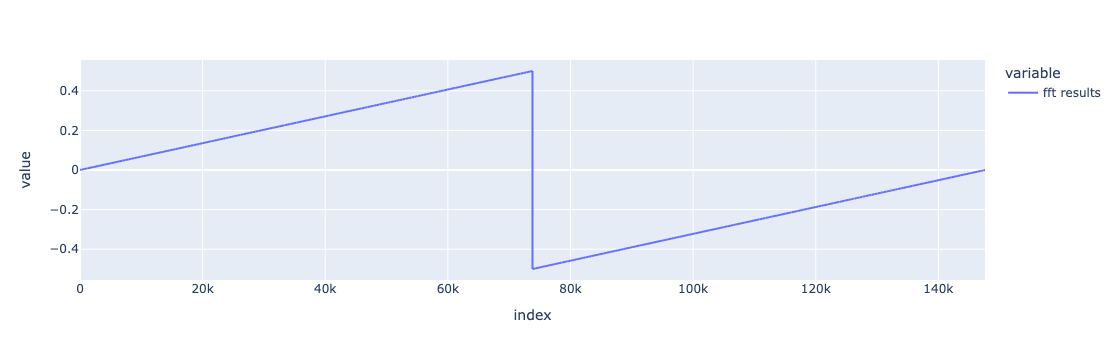

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -42.77385161931091,
  'P-value': 0.0,
  'Lags': np.int64(73),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -42.774
  P-value                         0.000
  Lags                               73
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-102.95382333254463),
  'P-value': 0.0,
  'Lags': 75,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic               -102.954
  P-value                         0.000
  Lags                               75
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -32.7563095067169,
  'P-value': 0.0,
  'Lags': np.int64(73),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -32.756
  P-value                         0.000
  Lags                               73
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}